In [ ]:
#Manthan (23410021) Geological Technology
#The Dataset used for this assignment is the |financial-sheets| available on kaggle website.
#link for the same =(https://www.kaggle.com/datasets/pacificrm/financial-sheets).
#I will be performing Classification on this dataset.

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, mean_squared_error,accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# Provide the full path to the file
file_path = "/Users/manthan/Gold  Prices.csv"
#loading the dataset
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())

                        Date        Open        High         Low       Close  \
0  2019-11-11 00:00:00-05:00  137.610001  137.789993  136.440002  137.059998   
1  2019-11-12 00:00:00-05:00  137.029999  137.589996  136.190002  137.429993   
2  2019-11-13 00:00:00-05:00  137.800003  138.220001  137.639999  137.979996   
3  2019-11-14 00:00:00-05:00  138.389999  138.940002  137.869995  138.559998   
4  2019-11-15 00:00:00-05:00  138.029999  138.419998  137.970001  138.210007   

     Volume  Dividends  Stock Splits  Capital Gains  
0   7037300        0.0           0.0            0.0  
1   6448600        0.0           0.0            0.0  
2   8776000        0.0           0.0            0.0  
3   5220500        0.0           0.0            0.0  
4  10106700        0.0           0.0            0.0  


In [5]:
#Now we look into some basic info of the dataset
df.shape

(1258, 9)

In [7]:
df.dtypes

Date              object
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
Dividends        float64
Stock Splits     float64
Capital Gains    float64
dtype: object

In [9]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Dividends',
       'Stock Splits', 'Capital Gains'],
      dtype='object')

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

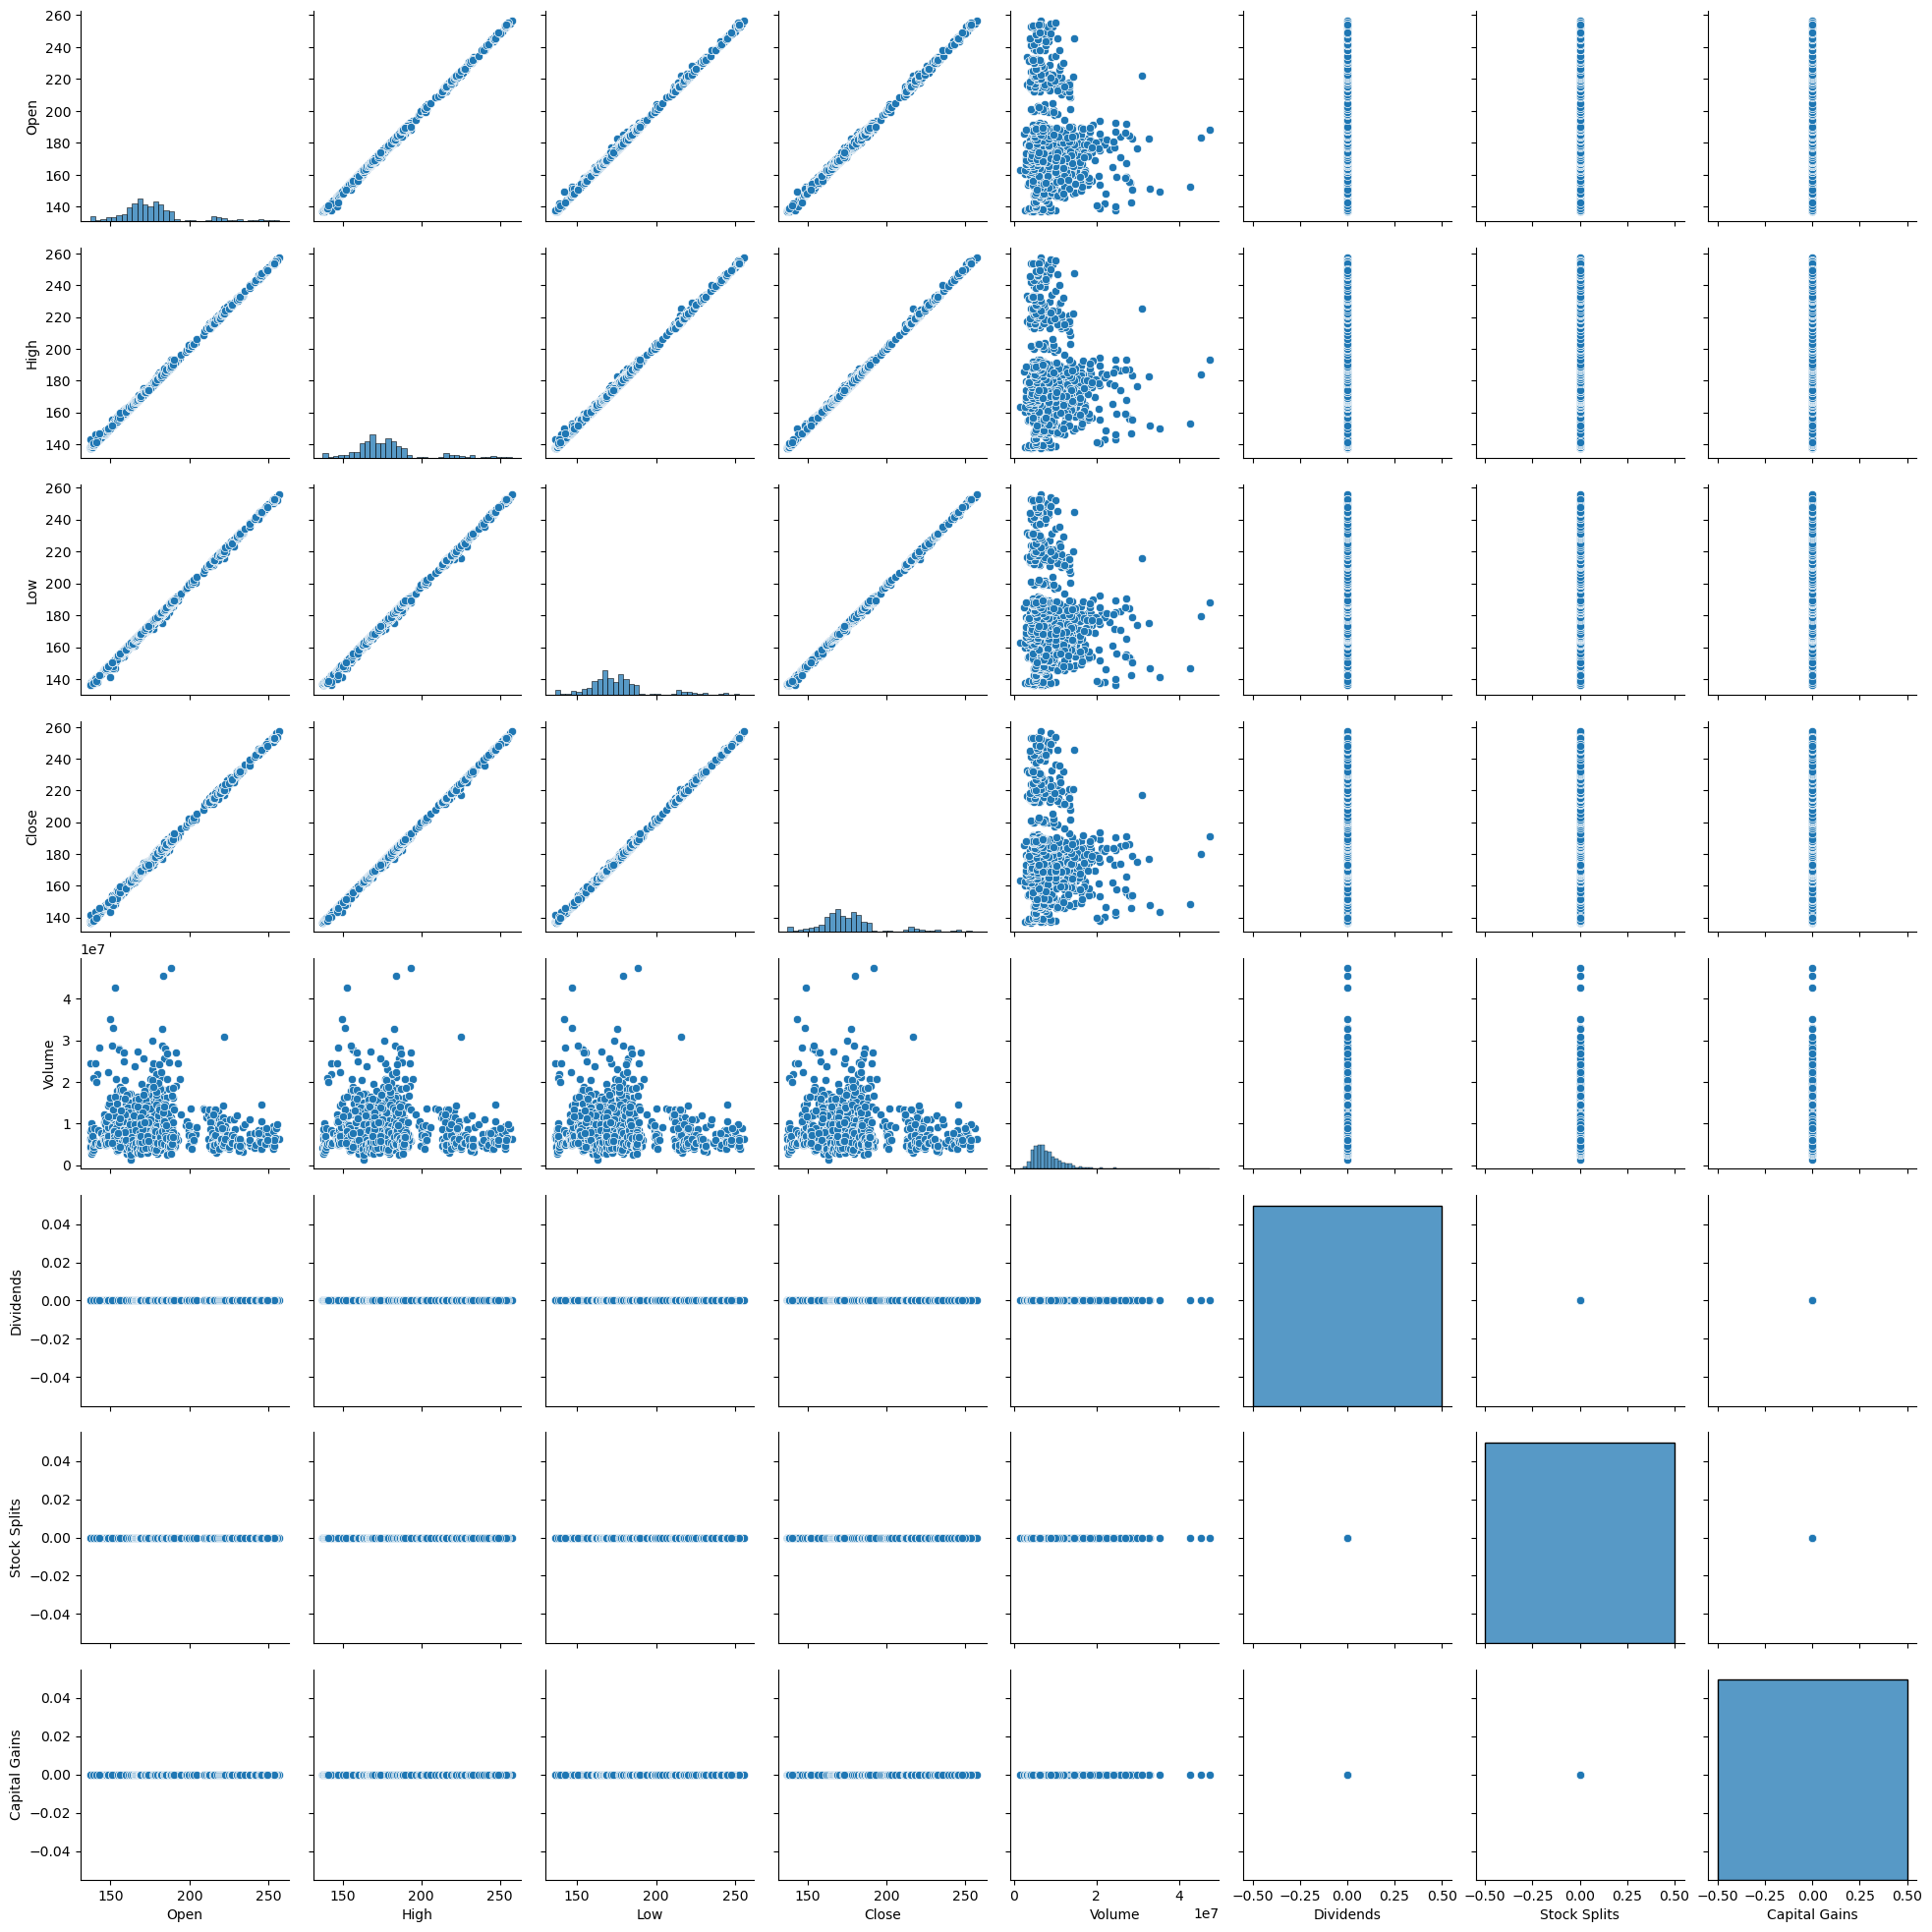

In [11]:
# Now we will draw some plots in order to know basic stats
import seaborn as sns 
import matplotlib.pyplot as plt
sns.pairplot(data=df)

In [13]:
#We try to find the missing values in dataset
df.isnull().sum()
# we didn't found any missing dataset

Date             0
Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
Capital Gains    0
dtype: int64

In [15]:
# Drop redundant columns (Dividends, Stock Splits, Capital Gains)
df = df.drop(columns=['Dividends', 'Stock Splits', 'Capital Gains'])

In [17]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2019-11-11 00:00:00-05:00,137.610001,137.789993,136.440002,137.059998,7037300
1,2019-11-12 00:00:00-05:00,137.029999,137.589996,136.190002,137.429993,6448600
2,2019-11-13 00:00:00-05:00,137.800003,138.220001,137.639999,137.979996,8776000
3,2019-11-14 00:00:00-05:00,138.389999,138.940002,137.869995,138.559998,5220500
4,2019-11-15 00:00:00-05:00,138.029999,138.419998,137.970001,138.210007,10106700


In [25]:
# Step 1: Convert 'Date' column to datetime with UTC normalization
df['Date'] = pd.to_datetime(df['Date'], errors='coerce', utc=True)

# Step 2: Remove time zone information and keep only the date
df['Date'] = df['Date'].dt.date

# Step 3: Verify the conversion and check for invalid dates
print("Converted 'Date' column (date only):")
print(df['Date'].head())

Converted 'Date' column (date only):
0    2019-11-11
1    2019-11-12
2    2019-11-13
3    2019-11-14
4    2019-11-15
Name: Date, dtype: object


In [27]:
df.head()

,Date,Open,High,Low,Close,Volume
0,2019-11-11,137.610001,137.789993,136.440002,137.059998,7037300
1,2019-11-12,137.029999,137.589996,136.190002,137.429993,6448600
2,2019-11-13,137.800003,138.220001,137.639999,137.979996,8776000
3,2019-11-14,138.389999,138.940002,137.869995,138.559998,5220500
4,2019-11-15,138.029999,138.419998,137.970001,138.210007,10106700


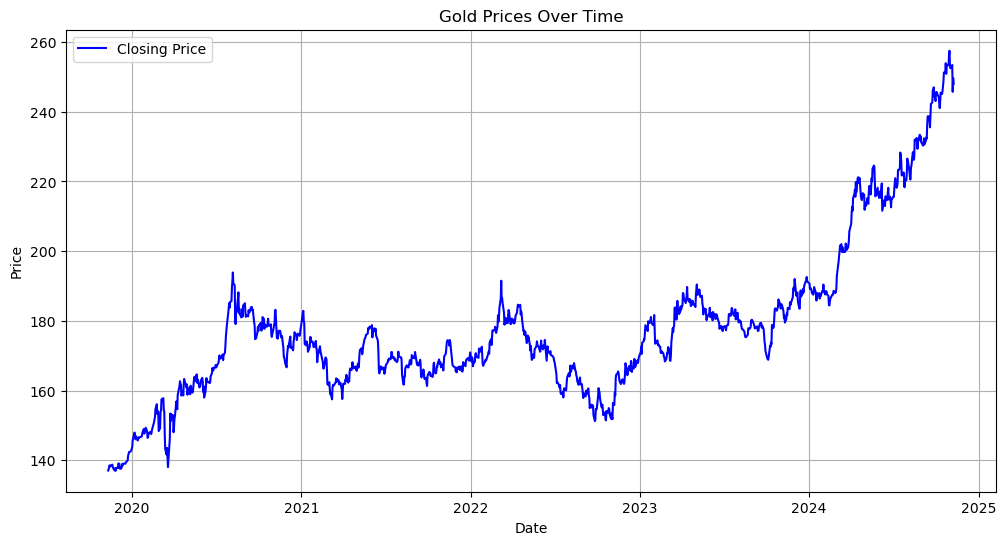

In [29]:
# Plot the trend of closing prices over time
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue')
plt.title('Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

In [31]:
# Calculate moving averages (20-day and 50-day)
df['20-Day MA'] = df['Close'].rolling(window=20).mean()
df['50-Day MA'] = df['Close'].rolling(window=50).mean()

# Calculate daily returns
df['Daily Return'] = df['Close'].pct_change()

# Calculate rolling volatility (30-day standard deviation of returns)
df['30-Day Volatility'] = df['Daily Return'].rolling(window=30).std()

# Display updated dataset with new metrics
print("Dataset with new metrics:")
print(df[['Date', 'Close', '20-Day MA', '50-Day MA', 'Daily Return', '30-Day Volatility']].head(10))
#These NaN values are only in the initial rows as 20 days MA, 50 Days MA require some initial data to be evaluated

Dataset with new metrics:
         Date       Close  20-Day MA  50-Day MA  Daily Return  \
0  2019-11-11  137.059998        NaN        NaN           NaN   
1  2019-11-12  137.429993        NaN        NaN      0.002700   
2  2019-11-13  137.979996        NaN        NaN      0.004002   
3  2019-11-14  138.559998        NaN        NaN      0.004204   
4  2019-11-15  138.210007        NaN        NaN     -0.002526   
5  2019-11-18  138.619995        NaN        NaN      0.002966   
6  2019-11-19  138.690002        NaN        NaN      0.000505   
7  2019-11-20  138.759995        NaN        NaN      0.000505   
8  2019-11-21  138.000000        NaN        NaN     -0.005477   
9  2019-11-22  137.740005        NaN        NaN     -0.001884   

   30-Day Volatility  
0                NaN  
1                NaN  
2                NaN  
3                NaN  
4                NaN  
5                NaN  
6                NaN  
7                NaN  
8                NaN  
9                NaN  


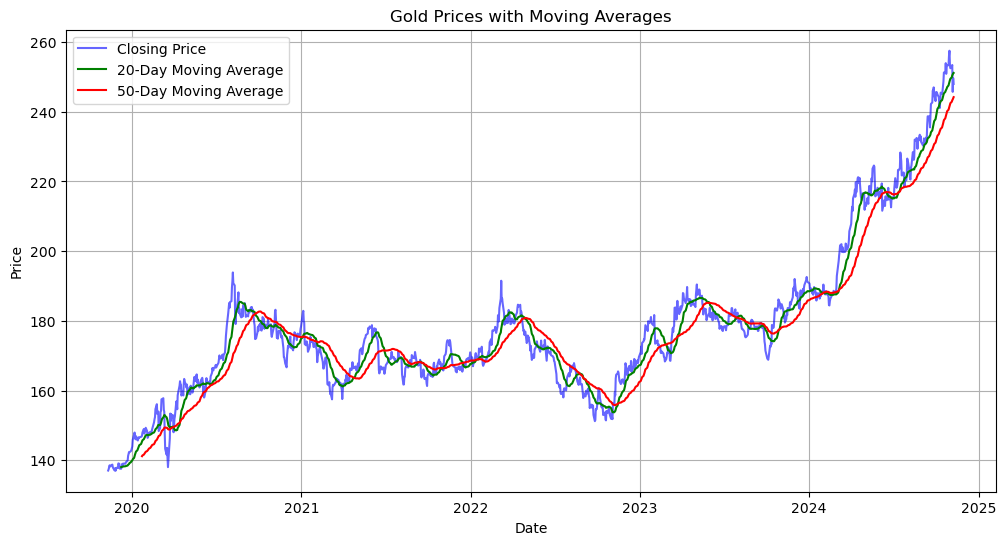

In [33]:
# Plot Closing Price and Moving Averages
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label='Closing Price', color='blue', alpha=0.6)
plt.plot(df['Date'], df['20-Day MA'], label='20-Day Moving Average', color='green')
plt.plot(df['Date'], df['50-Day MA'], label='50-Day Moving Average', color='red')
plt.title('Gold Prices with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

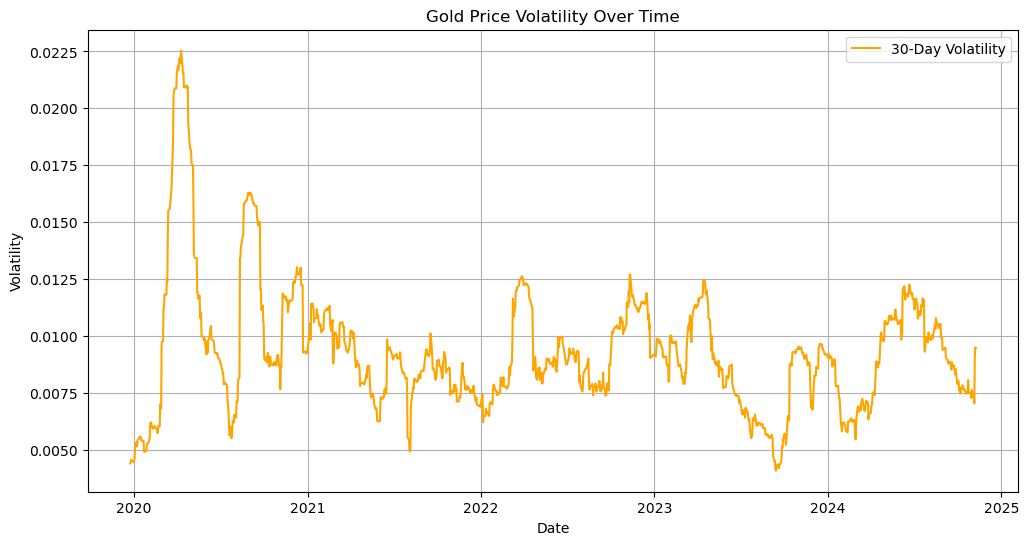

In [35]:
# Plot Volatility
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['30-Day Volatility'], label='30-Day Volatility', color='orange')
plt.title('Gold Price Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.grid()
plt.show()

In [ ]:


X = df[features]
y = df[target]

# Step 2: Split the data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Step 4: Evaluate the model on the test data
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Step 5: Predict future prices
# For simplicity, use the last row of features as the input for prediction
future_features = X.iloc[-1:]  # Use the most recent features as input
predicted_price = model.predict(future_features)

print(f"Predicted Future Gold Price: {predicted_price[0]}")

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


# Ensure dataset is cleaned and preprocessed
# Assuming `df` is already cleaned and includes calculated features (e.g., Moving Averages)
df = df.dropna()  # Drop rows with NaN (required for modeling)

#Define features and target
features = ['Open', 'High', 'Low', 'Volume', '20-Day MA', '50-Day MA', '30-Day Volatility']
target = 'Close'

In [39]:
#Split the data into training and testing datasets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
#Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [43]:
#Evaluate the model on the test data
y_pred = model.predict(X_test)

In [47]:
# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [49]:
print(mse,r2)

0.5243478941144187 0.9986702840798376


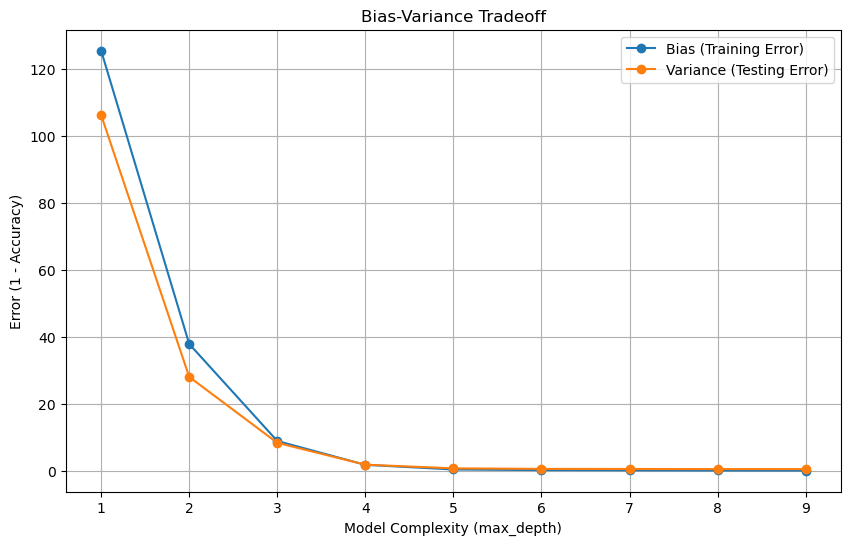

In [75]:
#Bias variance plot on increasing complexity
train_errors, test_errors = [], []

max_depth_range = range(1, 10) 
for max_depth in max_depth_range:
    model = RandomForestRegressor(max_depth=max_depth, n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    train_accuracy = mean_squared_error(y_train, model.predict(X_train))
    test_accuracy = mean_squared_error(y_test, model.predict(X_test))
    
    train_errors.append(train_accuracy)
    test_errors.append(test_accuracy)

plt.figure(figsize=(10, 6))
plt.plot(max_depth_range, train_errors, label="Bias (Training Error)", marker='o')
plt.plot(max_depth_range, test_errors, label="Variance (Testing Error)", marker='o')
plt.legend()
plt.title("Bias-Variance Tradeoff")
plt.xlabel("Model Complexity (max_depth)")
plt.ylabel("Error (1 - Accuracy)")
plt.grid()
plt.show()

In [ ]:
#Financial data is prone to overfitting due to its high noise-to-signal ratio, short-term trends, and behavioral biases, leading models to capture noise rather than generalizable patterns. To mitigate this, use regularization techniques (e.g., limiting max_depth, min_samples_leaf) and time-series-specific approaches like rolling cross-validation or ARIMA/LSTM models.